# 1. Libraries

In [52]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split

# 2. Example: Advertising Data

In [53]:
# shape of the DataFrame
data . shape


(200, 9)

In [21]:
# read data into a DataFrame
data = pd . read_csv( 'ads.csv' , index_col = 0 )
data . head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


C:\Users\PATEL TITHI\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


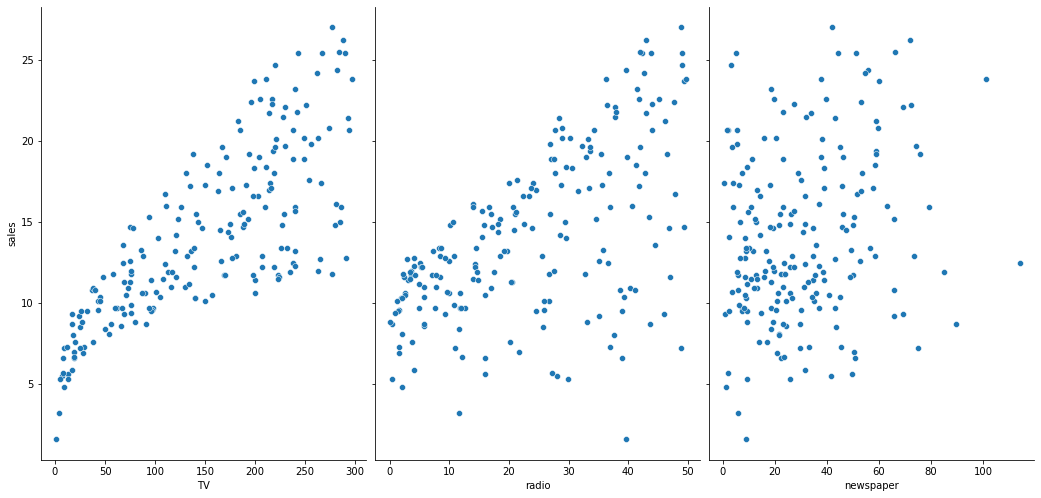

In [23]:
# visualize the relationship between the features and the response using scatterplots
sns . pairplot(data, x_vars = [ 'TV' , 'radio' , 'newspaper' ], y_vars = 'sales' , size = 7 , aspect = 0.7 )


In [24]:
### STATSMODELS ###
# create a fitted model
lm1 = smf . ols(formula = 'sales ~ TV' , data = data) . fit()
# print the coefficients
lm1 . params

Intercept    7.032594
TV           0.047537
dtype: float64

In [25]:
### SCIKIT-LEARN ###
# create X and y
feature_cols = [ 'TV' ]
X = data[feature_cols]
y = data . sales
# instantiate and fit
lm2 = LinearRegression()
lm2 . fit(X, y)
# print the coefficients
print (lm2 . intercept_)
print (lm2 . coef_)


7.032593549127694
[0.04753664]


In [26]:
### STATSMODELS ###
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd . DataFrame({ 'TV' : [ 50 ]})
# predict for a new observation
lm1 . predict(X_new)


0    9.409426
dtype: float64

C:\Users\PATEL TITHI\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


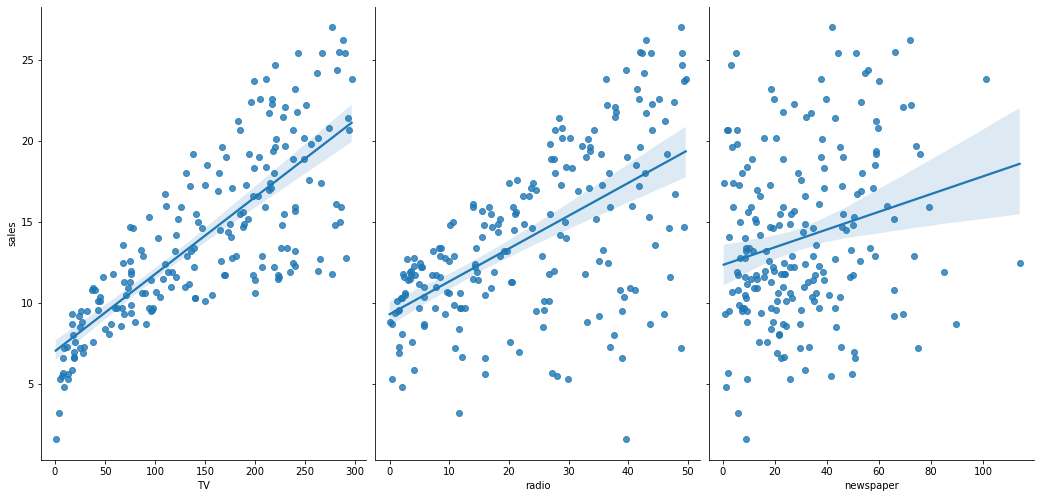

In [27]:
sns . pairplot(data, x_vars = [ 'TV' , 'radio' , 'newspaper' ], y_vars = 'sales' , size = 7 , aspect = 0.7 ,
kind = 'reg' )

In [28]:
### STATSMODELS ###

# print the confidence intervals for the model coeffcients
lm1.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [29]:
### STATASMODELS ###

#print the p value foe the model coeffcients
lm1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [30]:
### STATSMODELS ####

#print the R-squared value for the model
lm1.rsquared

0.611875050850071

In [31]:
#### SCIKIT-LEARN ###
# print the R squared value for the model
lm2.score(X,y)

0.611875050850071

In [32]:
##### STATSMODELS ####

# creat a fitted model with all three features
lm1 = smf.ols(formula='sales ~ TV + radio + newspaper',data=data).fit()

# print the coefficients
lm1.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [33]:
### SCIKIT - LEARN ###

# create X and Y
feature_cols = ['TV','radio','newspaper']
x = data[feature_cols]
y = data.sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X , y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

7.032593549127694
[0.04753664]


In [34]:
# pair the feature names with the coefficients
list(zip(feature_cols,lm2.coef_))

[('TV', 0.04753664043301976)]

In [35]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           1.58e-96
Time:                        09:44:16   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
### STATSMODELS ####

# only include TV and redio in the model

# instantiate and fit model
lm1 = smf.ols(formula='sales ~ TV + radio',data=data).fit()

# calculate r-square
lm1.rsquared

0.8971942610828957

In [37]:
# add Newspaper to the model (which we believe has no association with sales)
lm1 = smf.ols(formula='sales ~ TV + radio + newspaper',data=data).fit()
lm1.rsquared

0.8972106381789522

In [38]:
# define true and predicted response value
y_true = [100,50,30,20]
y_pred = [90,50,50,30]

# calculate MAE,MSE,RMSE
print(metrics.mean_absolute_error(y_true,y_pred))
print(metrics.mean_squared_error(y_true,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_true,y_pred)))

10.0
150.0
12.24744871391589


#  16. Model Evalution Using Train/Test split

In [39]:
# include Newspaper
X = data[['TV', 'radio', 'newspaper']]
y = data.sales
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Instantiate model
lm2 = LinearRegression()
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328953


# 17. Handling categorical Features with Two categories

In [40]:
# set a seed for reproducibility
np.random.seed(12345)
# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5
# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
# Series.loc is a purely label-location based indexer for selection by label
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [41]:
# create a new Series called Size_large
data['Size_large'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,radio,newspaper,sales,Size,Size_large
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [44]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'Size_large']
X = data[feature_cols]
y = data.sales
# instantiate
lm2 = LinearRegression()
# fit
lm2.fit(X, y)
# print coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.04571982092436277),
 ('radio', 0.18872814313427855),
 ('newspaper', -0.0010976794483516592),
 ('Size_large', 0.05742385085482777)]

# 18. Handling Categorical Features with More than Two categories

In [45]:
# set a seed for reproducibility
np.random.seed(123456)
# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
# Series.loc is a purely label-location based indexer for selection by label
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,radio,newspaper,sales,Size,Size_large,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


In [46]:
# create three dummy variables using get_dummies
pd.get_dummies(data.Area, prefix='Area').head()

,Area_rural,Area_suburban,Area_urban
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0


In [47]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]
area_dummies.head()

,Area_suburban,Area_urban
1,0,0
2,0,1
3,0,0
4,0,1
5,1,0


In [49]:
# concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1
#means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,radio,newspaper,sales,Size,Size_large,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [50]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'Size_large', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.sales
# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)
# print the coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.04574401036331374),
 ('radio', 0.18786669552525825),
 ('newspaper', -0.0010876977267108808),
 ('Size_large', 0.07739660749747929),
 ('Area_suburban', -0.10656299015958641),
 ('Area_urban', 0.2681380216522005)]